In [20]:
import pandas as pd
import numpy as np
from INDOML.model.supervised import RegresiLinear
from INDOML.model.Ensemble import BoostingRegressi
from INDOML.datamanipulasi.fold import train_val_split
from INDOML.post_processing.evaluasi import mean_absolute_error,mean_square_error,root_mean_square_eroor,mean_percentage_error
import matplotlib.pyplot as plt


In [2]:
#membaca file
df = pd.read_csv('data_minmax.csv')
df.head(5)

,displacement,horsepower,weight,acceleration,cylinders,origin,model_year,mpg
0,0.617571,0.456522,0.536150,0.238095,8,1,70,18.0
1,0.728682,0.646739,0.589736,0.208333,8,1,70,15.0
2,0.645995,0.565217,0.516870,0.178571,8,1,70,18.0
3,0.609819,0.565217,0.516019,0.238095,8,1,70,16.0
4,0.604651,0.510870,0.520556,0.148810,8,1,70,17.0


In [3]:
#convert to numpy
X=df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [4]:
#split data
X_train, X_val, y_train, y_val = train_val_split(X,y,0.2,1304211035)

# REGRESI LINIAR TUNGGAL 

In [5]:
#inisisasi object Regresi linear
reg = RegresiLinear()

In [6]:
#train model dan prediksi
y_pred =reg.fit_predict(X_train,y_train)

In [7]:
mean_absolute_error(y_train,y_pred)

2.6135708261494663

In [8]:
mean_square_error(y_train,y_pred)

12.330916127101558

In [9]:
root_mean_square_eroor(y_train,y_pred)

3.5115404208269565

In [10]:
mean_percentage_error(y_train,y_pred)

11.551120454263833

# BOOSTING REGRESI LINEAR NON LIBRARY SCIKIT-LEARN

In [11]:
#inisiasi object boosting learning rate 0.1, jumlah model 100
boos = BoostingRegressi(0.1,100)

In [12]:
#train model dan prediksi y_train
y_pred_train = boos.fit_predict(X_train,y_train)

In [13]:
y_pred_train

array([27.15732292, 30.25578863, 27.32716452, 29.17395184, 13.72298607,
       33.0618215 , 19.39867261, 21.87183333, 14.62304027, 18.18325979,
       15.24024451, 22.67297477, 17.12007459, 29.49811174, 10.79996301,
       27.66065009, 15.07808896, 31.37576767, 17.36619182, 15.6513081 ,
       19.39365352, 27.85394291, 21.88052912, 33.2794374 , 32.22656117,
       22.01740455, 30.50457496, 27.22937655, 26.18762333, 18.96044987,
       19.68558575, 31.49447979, 28.89652431, 30.80079145, 25.36830412,
       14.32250616, 32.9795967 , 23.6814629 , 27.59499612, 21.50261518,
       21.9774633 , 28.81248773, 13.10638264, 10.65971997, 31.12773128,
       31.03504375, 26.35795484, 29.65166178, 20.79963439, 27.52662719,
       12.24020709, 28.5564179 , 21.12353528, 29.1729862 , 23.35514084,
       26.77857978, 25.7294297 , 29.43563636, 13.53076429, 31.60645908,
       11.74240975, 18.58861206, 29.94611563, 29.60911068, 23.33204342,
       16.26518493, 28.76416723, 19.17943465, 26.26192935, 30.22

In [14]:
#Evaluasi

mae = mean_absolute_error(y_train,y_pred_train)
mse = mean_square_error(y_train, y_pred_train)
rmse = root_mean_square_eroor(y_train, y_pred_train)
mpe = mean_percentage_error(y_train,y_pred_train)

print(
    f"Mean absolute error : {mae}\n",
    f"Mean Square error : {mse}\n",
    f"Root Mean Square error : {rmse}\n",
    f"Mean Percentage error : {mpe}\n"
)

Mean absolute error : 2.9284499796742054
 Mean Square error : 15.035219079454112
 Root Mean Square error : 3.877527444062016
 Mean Percentage error : 12.643255005297407



In [15]:
#prediksi data validasi
val = boos.predict(X_val)

In [16]:
val

array([11.81112285, 20.56992893, 29.55981887, 27.16554599, 16.21238714,
       16.54819255, 16.99201661, 32.88827809, 22.91870935, 28.25328326,
       13.31822802, 18.72609114, 13.37188659, 29.46944136, 18.87643037,
       21.61119923, 12.20888865, 30.83814608, 12.79966753, 25.94075081,
       28.58755624, 30.13910247, 30.06669188, 26.38609427, 15.3586139 ,
       23.54057722, 23.73819831, 25.18191277, 14.9869941 , 33.65709202,
       13.90856728, 22.32292844, 11.77514312, 29.60955472, 22.39940428,
       24.16494813, 31.16755188,  8.94034477, 15.87524182, 21.00985937,
       19.02317727, 31.66340189, 10.68062119, 31.20486021, 19.5768258 ,
       32.14751694, 32.66269954, 26.56323272, 23.65065543, 27.79926675,
       26.53691119, 30.79758889, 29.84782105, 34.20781743, 11.67537517,
       29.89247899, 22.30509807, 32.45926046, 19.03200696, 28.47778192,
       21.39343513, 23.78921899, 29.66374954, 16.81721082, 27.55846284,
       17.51891803, 17.41144533, 28.50245669, 32.38138952, 21.19

In [17]:
#Evaluasi

mae = mean_absolute_error(y_val,val)
mse = mean_square_error(y_val, val)
rmse = root_mean_square_eroor(y_val, val)
mpe = mean_percentage_error(y_val,val)

print(
    f"Mean absolute error : {mae}\n",
    f"Mean Square error : {mse}\n",
    f"Root Mean Square error : {rmse}\n",
    f"Mean Percentage error : {mpe}\n"
)

Mean absolute error : 2.915276738089721
 Mean Square error : 14.302452849097438
 Root Mean Square error : 3.7818583856481776
 Mean Percentage error : 13.21155223316192



In [21]:
def plotscater(x,y,title,x_label,y_label):
    plt.plot(x,y,marker='o', linestyle='--')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [18]:
#visualisasi mae learning rate : 0.1 , n_estimator 5 - 100
mae_list = []
n_estimator = []
for n in range(5,101,5):
    n_estimator.append(n)
    obj = BoostingRegressi(0.1,n)
    obj.fit(X_train,y_train)
    val = obj.predict(X_val)
    mae_list.append(mean_absolute_error(y_val,val))

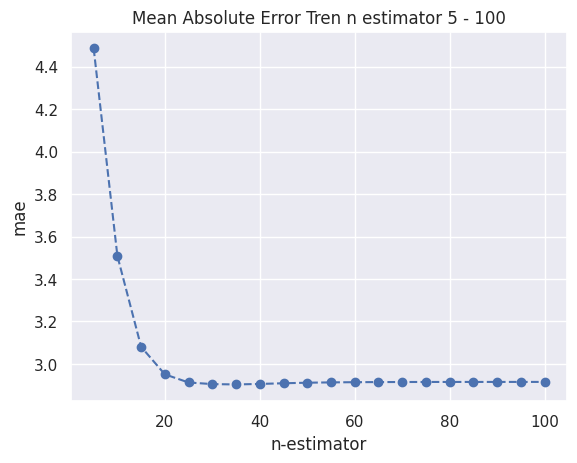

In [22]:
plotscater(n_estimator,mae_list,'Mean Absolute Error Tren n estimator 5 - 100','n-estimator','mae')

In [26]:
#visualisasi mse learning rate : 0.1 , n_estimator 5 - 100
mse_list = []
n_estimator = []
for n in range(5,101,5):
    n_estimator.append(n)
    obj = BoostingRegressi(0.1,n)
    obj.fit(X_train,y_train)
    val = obj.predict(X_val)
    mse_list.append(mean_square_error(y_val,val))

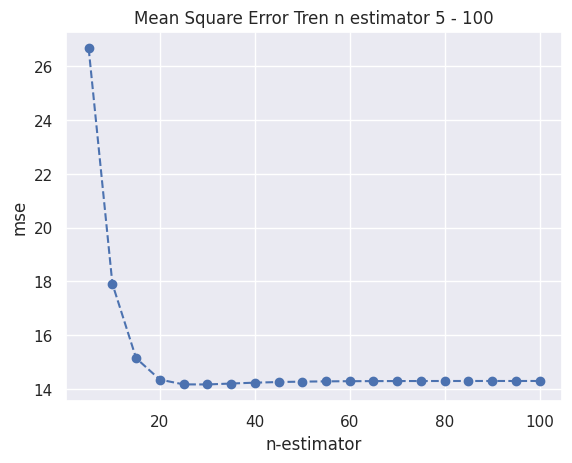

In [27]:
plotscater(n_estimator,mae_list,'Mean Square Error Tren n estimator 5 - 100','n-estimator','mse')

In [29]:
#visualisasi rmse learning rate : 0.1 , n_estimator 5 - 100
rmse_list = []
n_estimator = []
for n in range(5,101,5):
    n_estimator.append(n)
    obj = BoostingRegressi(0.1,n)
    obj.fit(X_train,y_train)
    val = obj.predict(X_val)
    rmse_list.append(root_mean_square_eroor(y_val,val))

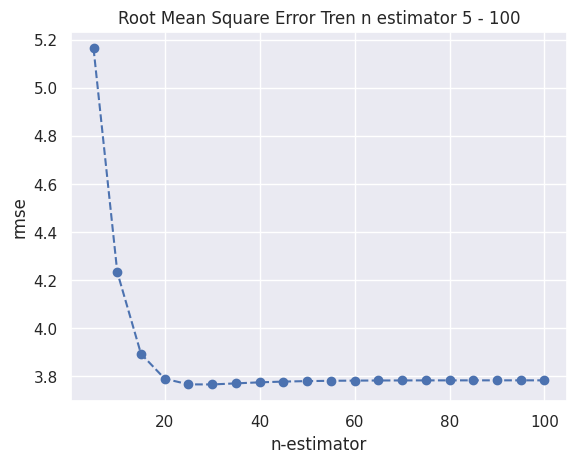

In [31]:
plotscater(n_estimator,rmse_list,'Root Mean Square Error Tren n estimator 5 - 100','n-estimator','rmse')

In [39]:
#visualisasi mpe learning rate : 0.1 , n_estimator 5 - 100
mpe_list = []
n_estimator = []
for n in range(5,101,5):
    n_estimator.append(n)
    obj = BoostingRegressi(0.1,n)
    obj.fit(X_train,y_train)
    val = obj.predict(X_val)
    mpe_list.append(mean_percentage_error(y_val,val))

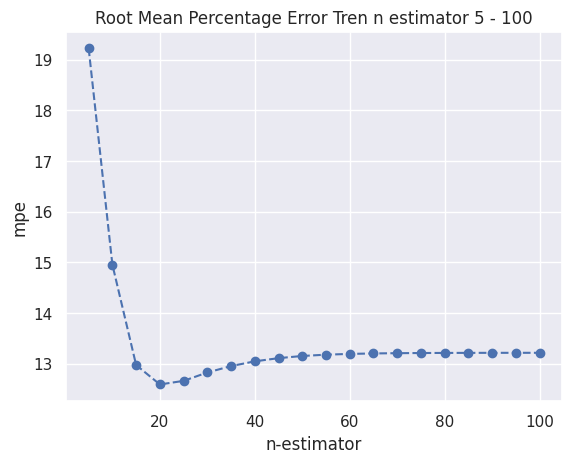

In [40]:
plotscater(n_estimator,mpe_list,'Root Mean Percentage Error Tren n estimator 5 - 100','n-estimator','mpe')